# Майнор "Интеллектуальный анализ данных"

# Курс "Прикладные задачи анализа данных"

## Лабораторная работа №2. RecSys

В рамках данной лабораторной работы вам предлагается решить задачу рекомендательной системы на основе следующих данных:

* **rating.csv** - рейтинги аниме по 10 бальной шкале
* **anime.csv** - описание items

Скачать данные можно [здесь](https://drive.google.com/drive/u/1/folders/1FarHUuqQq4tQSlERB9K8uEfZAZT9tQWv)

# Данные

Данные содержат информацию об предподчтениях 73,516 пользователей в 12,294 аниме. Каждый пользователь может добавить аниме и выставить рейтниг.

Anime.csv

* anime_id - идентификатор аниме (items)
* name - полное название аниме
* genre - категория/категории для аниме (разделены запятой).
* type - тип: movie, TV, OVA, etc.
* episodes - количество эпизодов (для экранизаций)
* rating - средний рейтинг по аниме.
* members - количество членов коммьюнити к аниме

Rating.csv

* user_id - идентификатор пользователя (users)
* anime_id - идентификатор аниме
* rating - рейтинг пользователя по аниме (-1 пользователь смотрел, но не оставил рейтинг).

### ``` Если вычеслительные ресурсы не позволяют решить задачу на всех данных, то необходимо это сделать на "сэмпле" данных (выбрав от 5% ids' для user и item). Этот же подход справедлив и для оценки работы алгоритомв```

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/LabRecSysData.zip

Archive:  /content/drive/MyDrive/LabRecSysData.zip
  inflating: anime.csv               
  inflating: rating.csv              


In [5]:
anime_data = pd.read_csv("anime.csv", index_col=None)
anime_data.shape

(12294, 7)

In [6]:
rating_data = pd.read_csv("rating.csv", index_col=None)
rating_data.shape

(7813737, 3)

In [7]:
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
rating_data

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [30]:
rating_without_empty = rating_data[rating_data['rating'] != -1]

## Необходимо сделать:

### Задание №1 : Exploratory analysis (2 балла):

* Распределение числа пользователей по количеству взаимодействий

In [ ]:
quantile = rating_data.groupby(['user_id']).size().quantile(0.95)
quant_rating = rating_data.groupby(['user_id']).size().where(lambda x: x <= quantile).dropna()
print('modes', quant_rating.mode().values)
print('mean', quant_rating.mean())

modes [1.]
mean 81.05548239335815


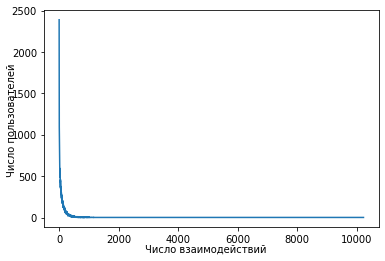

In [ ]:
s = rating_data.groupby(['user_id']).count()['anime_id'].to_frame(0).groupby(0)[0].count()
res = s.to_frame(0)
fig, ax = plt.subplots()
fig.text(0.5, 0.04, 'Число взаимодействий', ha='center')
fig.text(0.04, 0.5, 'Число пользователей', va='center', rotation='vertical')
ax.plot(res)

Чаще всего люди оценивают 1 фильм (изходя из моды), но в среднем 81 (исходя из медианы)

* Разпределение числа "айтемов" по количеству взаимодействий

In [ ]:
quantile = rating_data.groupby(['anime_id']).size().quantile(0.95)
quant_rating = rating_data.groupby(['anime_id']).size().where(lambda x: x <= quantile).dropna()
print('modes', quant_rating.mode().values)
print('mean', quant_rating.mean())

modes [1.]
mean 328.0750939849624


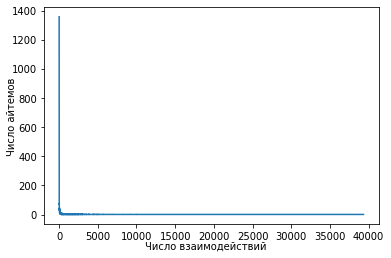

In [ ]:
s = rating_data.groupby(['anime_id']).count()['user_id'].to_frame(0).groupby(0)[0].count()
res = s.to_frame(0)
fig, ax = plt.subplots()
fig.text(0.5, 0.04, 'Число взаимодействий', ha='center')
fig.text(0.04, 0.5, 'Число айтемов', va='center', rotation='vertical')
ax.plot(res)

* Распределение числа рейтингов, средних рейтингов по пользователям, по "айтемам"

С большинством фильмов есть только одно взаимодействие, но в среднем с фильмами есть 328 взаимодействий

Text(0, 0.5, 'Число оценок')

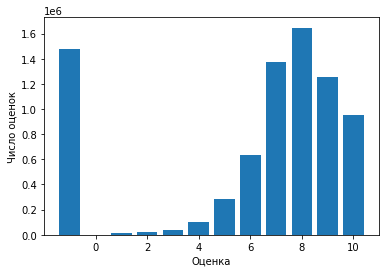

In [ ]:
res = rating_data.groupby('rating').size()
plt.bar(res.index.tolist(), res.tolist())
plt.xlabel('Оценка')
plt.ylabel('Число оценок')

Люди, в основном либо вообще не оценивают фильм, либо ставят 7 или 8

Text(0, 0.5, 'Число оценок')

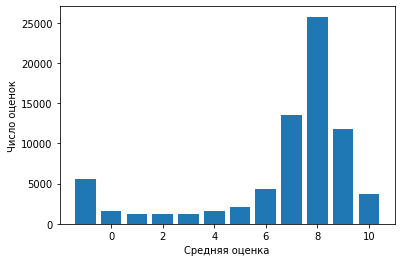

In [ ]:
res = rating_data.groupby('user_id')['rating'].mean().apply(lambda x: round(x)).to_frame(0).groupby(0)[0].count()
plt.bar(res.index.tolist(), res.tolist())
plt.xlabel('Средняя оценка')
plt.ylabel('Число оценок')

Люди в основном ставят 7 или 8 или 9

Text(0, 0.5, 'Число фильмов')

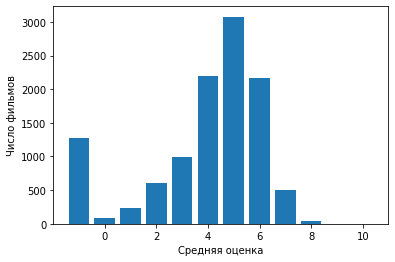

In [ ]:
res = rating_data.groupby('anime_id')['rating'].mean().apply(lambda x: round(x)).to_frame(0).groupby(0)[0].count()
plt.bar(res.index.tolist(), res.tolist())
plt.xlabel('Средняя оценка')
plt.ylabel('Число фильмов')

Фильмы в среднем имеют оценку 5 - 6

### Задание №2 : Оценить разреженность данных по рейтингу (1/2 балла)

In [ ]:
sparsity = float(len(rating_data[rating_data['rating'] != -1]))
sparsity /= len(rating_data['rating'])
sparsity *= 100
print('Sparsity: ', sparsity)

Sparsity:  81.10384314189228


В данных оценка остуствтсвует у 19% пользователей, что является довольно быльшим значением.

### Задание №3 : Разделить данные на тренировочные и валидационные (1/2 балла)

In [9]:
import numpy as np

Из-за небольших вычислительных мощностей было принято решение работать только с 5% данных

In [10]:
anime_samples = 1200
user_samples = 7350
anime_data_sample = anime_data[anime_data["anime_id"] < anime_samples]
rating_data_sample = rating_data[(rating_data["user_id"] < user_samples) & (rating_data["anime_id"] < anime_samples)]

In [11]:
anime_data_sample

,anime_id,name,genre,type,episodes,rating,members
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
20,263,Hajime no Ippo,"Comedy, Drama, Shounen, Sports",TV,75,8.83,157670
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83,129307
...,...,...,...,...,...,...,...
11872,755,Boku no Sexual Harassment,"Hentai, Yaoi",OVA,3,5.96,9980
11873,692,Dousou Kai,"Harem, Hentai, Romance",OVA,4,5.96,1047
12096,724,Enzai,"Hentai, Horror, Yaoi",OVA,2,5.55,13711
12105,977,Ginga Teikoku no Metsubou Gaiden: Aoki Ookami-...,"Action, Hentai, Mecha, Sci-Fi, Yaoi",OVA,1,5.53,4559


Таблица Х создана для применения SVD из библиотеки numpy:

In [12]:
X = np.zeros((user_samples, anime_data_sample.shape[0]), np.int64) 

for rating in rating_data_sample.values:
    if rating[1] < anime_data_sample.shape[0]:
        X[rating[0] - 1][rating[1] - 1] = rating[2]

In [13]:
X.shape

(7350, 1094)

In [14]:
anime_data_sample.values.shape

(1094, 7)

In [15]:
anime_ids = ["none"] * anime_data_sample.values.shape[0]

i = 0
for x in anime_data_sample.values:
    anime_ids[i]=x[0]
    i += 1

X_df = pd.DataFrame(X, columns=anime_ids)

In [16]:
X_df

,820,918,199,263,44,1,164,457,245,431,...,1038,220,736,827,828,755,692,724,977,730
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7345,-1,0,0,0,0,9,8,0,0,0,...,0,0,0,8,0,0,0,0,0,0
7346,10,0,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
TRESHOLD = 0.3

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train, test = train_test_split(X_df, test_size = TRESHOLD)

In [20]:
train_data, test_data = train_test_split(rating_data_sample, test_size = TRESHOLD)

### Задание №4 : Решить задачу на основе предложения всем юзерам наиболее популярных item (1 балл)

Наиболее популярные по числу оценок:

In [45]:
class NPopularByRatingNumberAnime:
    def __init__(self, data):
        self.top = data['anime_id'].value_counts().sort_values(ascending = False).index

    def predict(self, user_id, top_n):
        return list(self.top[:top_n])

In [46]:
n_pop_by_rating_number_anime = NPopularByRatingNumberAnime(rating_without_empty)
popular_anime = n_pop_by_rating_number_anime.predict(1, 10)

In [32]:
popular_anime

[1535, 11757, 16498, 1575, 6547, 226, 20, 5114, 121, 2904]

In [33]:
anime_data[anime_data['anime_id'].isin(popular_anime)].astype({'anime_id': pd.CategoricalDtype(popular_anime, ordered=True)}).sort_values('anime_id')

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
760,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
200,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888


Наиболее популярные по числу взаимодействий (с пустыми отзывами):

In [34]:
n_pop_by_rating_number_anime = NPopularByRatingNumberAnime(rating_data)
popular_anime = n_pop_by_rating_number_anime.predict(1, 10)

In [35]:
anime_data[anime_data['anime_id'].isin(popular_anime)].astype({'anime_id': pd.CategoricalDtype(popular_anime, ordered=True)}).sort_values('anime_id')

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
760,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
200,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


При сравнении результатов можно увидить, что пустые отзывы влияют  на рейтинг, но не сильно. В топ10 лишь две пары аниме поменяялись местами, и изменился замыкающий фильм.

### Задание №5 : Решить задачу на основе коллоборативной фильтрации (2 балла)

* Реализовать один из методов коллоборативной фильтрации SVD, SVD++, ALS, ALS with implicit feedback

Использование готовой реализации из библиотеки surprise

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633715 sha256=9aa315af5cd9c5c59f9ca460f3d4c505347184e818d1dfd633bb602cf2fbcefb
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
import os

In [ ]:
class SVDSurpriseAnimePredictor:
    def __init__(self, random_state=0, n_factors=10, n_epochs=30):
        self.svd = SVD(random_state=random_state, n_factors=n_factors, n_epochs=n_epochs)
        self.item_ids = None
    
    def fit(self, train_data):
        self.item_ids = list(train_data['anime_id'].unique())
        train_sup = Dataset.load_from_df(train_data, reader=Reader(line_format='user item rating'))
        train_sup = train_sup.build_full_trainset()
        self.svd.fit(train_sup)

    def predict(self, user_id, top_n=10):
        predictions = [[item_id, self.svd.predict(user_id, item_id, clip = False).est] for item_id in self.item_ids]

        predictions = list(sorted(predictions, key = lambda x: x[1], reverse = True))
        return [x[0] for x in predictions]

    def predict_score(self, user_id, item_id):
        return self.svd.predict(user_id, item_id, clip = False).est

In [ ]:
svdSurprise = SVDSurpriseAnimePredictor()
svdSurprise.fit(train_data)

In [ ]:
svdSurprise.predict(3, 10)

[19, 781, 223, 578, 813, 523, 777, 263, 15, 918]

Самостоятельное использование SVD.

**U** - признаки (факторы) пользователей.

**V** - признаки аниме.

**D** - вспомогательная матрица.

Для получения предсказанной оценки по аниме J для пользователя I достаточно скалярно перемножить
U[I] * V[J]

In [ ]:
from numpy.linalg import svd

In [ ]:
class SVDAnimePreditor:
    def __init__(self):
        self.data_SVD = None
        self.data = None

    def fit(self, data, k=10):
        self.data = data
        u, d, v = svd(self.data.values)
        U = u[:, :k]
        D = np.diag(d)[:k, :k]
        V = v[:k, :]
        self.data_SVD = np.dot(np.dot(U, D), V)

    def predict(self, user_id, top_n=10):
        index = np.argsort(self.data_SVD[user_id - 1])[::-1]
        return self.data.columns[index]

    def predict_score(self, user_id, item_id):
        return self.data_SVD[user_id - 1][self.data.columns.get_loc(item_id)]

In [ ]:
svd_anime = SVDAnimePreditor()
svd_anime.fit(X_df, k=500)

### Задание №6 Решить задачу на основе контент-based подхода, выбрав один из методов решения (2 балла):

* На основание векторов с факторизационной матрицы
* При помощи "ембеддингов"  item'ов

In [36]:
from gensim.models import Word2Vec

Конвертация anime_id в строки:

In [37]:
rating_data['anime_id'] = rating_data['anime_id'].astype(str)

In [38]:
prior_anime = rating_data.groupby('user_id').apply(lambda x: x['anime_id'].tolist())

In [39]:
prior_anime

user_id
1        [20, 24, 79, 226, 241, 355, 356, 442, 487, 846...
2                                    [11771, 12189, 16417]
3        [20, 154, 170, 199, 225, 341, 430, 527, 552, 8...
4        [6, 72, 121, 150, 166, 205, 226, 857, 1292, 14...
5        [6, 15, 17, 18, 20, 22, 24, 30, 45, 47, 57, 63...
                               ...                        
73512    [60, 98, 101, 120, 199, 226, 339, 355, 552, 65...
73513    [1, 5, 71, 101, 164, 180, 181, 195, 196, 199, ...
73514                                                [512]
73515    [1, 5, 6, 19, 27, 30, 33, 57, 67, 71, 72, 73, ...
73516                                          [790, 8074]
Length: 73515, dtype: object

In [40]:
max_user_length = max(map(len, prior_anime))

In [41]:
w2v_model = Word2Vec(
    prior_anime.values,
    size=100,
    window=max_user_length,
    min_count=2)

In [42]:
def get_user_product_table(
    df_anime: pd.DataFrame,
    df_rating: pd.DataFrame):
  user_item_df = rating_data # pd.merge(df_anime, df_rating, how='left', on=["anime_id"])
  user_item_df.drop_duplicates(inplace=True, ignore_index=True)

  product_counts = user_item_df[['user_id', 'anime_id']].value_counts()
  product_counts.name = 'frequency'
  user_activeness = user_item_df.groupby('user_id')['anime_id'].nunique()
  user_activeness.name = 'frequency'
  ratings_table = product_counts.divide(user_activeness, axis='index').reset_index()
  
  return ratings_table

In [43]:
ratings_table = get_user_product_table(anime_data, rating_data)

ratings_table.head()

,user_id,anime_id,frequency
0,42653,20507,0.02381
1,42653,22319,0.02381
2,42653,23283,0.02381
3,42653,1575,0.02381
4,42653,2001,0.02381


In [44]:
def get_recommendations(
    user_id: int,
    ratings_table: pd.DataFrame,
    favorite_length: int = 10):
      user_ratings = ratings_table[ratings_table['user_id'] == user_id]
      users_top = user_ratings.sort_values('frequency', ascending=False)[:favorite_length]
      # print(users_top['anime_id'].astype(str).tolist())
      similar_products = w2v_model.wv.most_similar(
      positive=users_top['anime_id'].astype(str).tolist(),
      topn=10)
      recommendations = [int(product[0]) for product in similar_products]
      return recommendations

### Задание №7 Оценить работу алгоритмов выбрав одну из метрик, сделать вывод по результатам работы (2 балла):

* MAP@k
* NDCG@k
* MRR

Оценка "ембеддингов" item'ов

In [47]:
ground_truth = test_data.groupby('user_id')['anime_id'].agg(list)

ground_truth.head()

user_id
1                                  [442, 24, 226, 355]
3                                     [199, 813, 1132]
4                                                [121]
5    [905, 874, 68, 918, 914, 24, 263, 205, 166, 19...
6                                                 [20]
Name: anime_id, dtype: object

In [48]:
test_users = ground_truth.index.to_numpy()

test_users_subsample = ratings_table.loc[ratings_table['user_id'].isin(test_users), 'user_id'].value_counts().index[:1000]

In [49]:
prediction = {user: get_recommendations(user, ratings_table) for user in test_users_subsample}

In [50]:
prediction = pd.Series(prediction)
prediction.index.name = 'user_id'
prediction.name = 'prediction'
prediction.head()

user_id
7345    [18099, 32954, 1116, 9940, 9523, 33192, 1738, ...
1530    [17345, 16119, 15545, 4561, 12191, 7158, 7333,...
5705    [1765, 10207, 2102, 212, 2524, 1144, 28351, 17...
2951    [20987, 18639, 21427, 9100, 26183, 21851, 1368...
5831    [5773, 2642, 2639, 2636, 4575, 5543, 9172, 418...
Name: prediction, dtype: object

In [51]:
def AP_k(y_true, y_pred, k=10):
    
    # Look if each of first k predicted items are included in the fact:
    hits = np.in1d(y_pred[:k], y_true)
    
    # Calculate precision at i for i = 1..k only for ranks included in the fact:
    p_k_list = [hits[:i].sum() / i for i in range(1, len(hits) + 1) if hits[i - 1]]
    
    # Return mean of calculated precisions:
    if p_k_list != []:
        return np.mean(p_k_list)
    else:
        return 0

def MAP_k(y_true, y_pred, k=10, weights=None):
    
    # Calculate average precision at k for each fact-prediction pair:
    ap_k_list = [AP_k(fact, pred, k) for fact, pred in zip(y_true, y_pred)]
    
    # Return mean of all calculated AP@k values (weighted mean is also possible):
    return np.average(ap_k_list, weights=weights)

In [52]:
def mean_NDCG_k(
        y_true: np.ndarray,
        y_pred: np.ndarray,
        k: int = 10,
        weights: np.ndarray = None):
    """
    Calculate mean normalized discounted cumulative gain at k (mean NDCG@k).

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated target values.

    k : int, default=10
        Maximum number of recommendations to take into account.

    weights : array_like of shape (n_samples,), optional
        An array of weights associated with observations. If weights=None,
        then all observations are assumed to have a weight equal to one.

    Returns
    -------
    score : float
        A non-negative floating point value (the best value is 1.0).
    """

    def _NDCG_k(fact, pred):
        # Look if each of first k predicted items are included in the fact:
        hits = np.in1d(pred[:k], fact)
        # Calculate discounted cumulative gain at i for i = 1..k:
        dcg_k_list = [(2 ** hits[i] - 1) / np.log2(i + 2) for i in range(len(hits))]
        # Calculate ideal DCG@k:
        idcg_k_list = [1 / np.log2(i + 1) for i in range(1, len(hits) + 1)]
        # Return the relation of calculated value to ideal one:
        return np.sum(dcg_k_list) / np.sum(idcg_k_list)

    # Calculate normalized discounted cumulative gain at k for each fact-prediction pair:
    ndcg_k_list = [_NDCG_k(fact, pred) for fact, pred in zip(y_true, y_pred)]
    # Return mean of all calculated NDCG@k values (weighted mean is also possible):
    return np.average(ndcg_k_list, weights=weights)

In [53]:
def print_scores(y_true, y_pred, k=10, weights=None):
    # print('HitRate@k = {:.5f}'.format(HitRate_k(y_true, y_pred, k)))
    print('MAP@k = {:.5f}'.format(MAP_k(y_true, y_pred, k, weights)))
    print('NDCG@k = {:.5f}'.format(mean_NDCG_k(y_true, y_pred, k, weights)))

In [54]:
print_scores(ground_truth.loc[test_users_subsample].sort_index(), prediction.sort_index(), k=10)

MAP@k = 0.03644
NDCG@k = 0.01434


Оценка SVD из библиотеки Surprise

In [ ]:
prediction_svd = {user: svdSurprise.predict(user_id=user) for user in test_users_subsample}

In [ ]:
prediction_svd = pd.Series(prediction_svd)
prediction_svd.index.name = 'user_id'
prediction_svd.name = 'prediction'
prediction_svd.head()

user_id
7345    [918, 43, 578, 199, 820, 44, 19, 205, 57, 801,...
1530    [372, 269, 813, 355, 15, 514, 601, 528, 1195, ...
5705    [820, 399, 398, 1124, 890, 851, 1182, 296, 290...
2951    [226, 934, 918, 187, 846, 813, 18, 160, 57, 85...
5831    [120, 530, 355, 790, 22, 81, 918, 861, 26, 185...
Name: prediction, dtype: object

In [ ]:
print_scores(ground_truth.loc[test_users_subsample].sort_index(), prediction_svd.sort_index(), k=10)

MAP@k = 0.18055
NDCG@k = 0.08331


Оценка собственного SVD

In [ ]:
prediction_svd = {user: svd_anime.predict(user_id=user) for user in test_users_subsample}

In [ ]:
prediction_svd = pd.Series(prediction_svd)
prediction_svd.index.name = 'user_id'
prediction_svd.name = 'prediction'
prediction_svd.head()

user_id
7345    Int64Index([ 133,  462,  558,  279,  170,  136...
1530    Int64Index([   5, 1016,  330,  133,  857,    6...
5705    Int64Index([ 693,  368, 1002,  978,  181,  599...
2951    Int64Index([ 321,  154,  152,  459,  962,   76...
5831    Int64Index([ 317, 1097, 1154,  512,  247,  795...
Name: prediction, dtype: object

In [ ]:
print_scores(ground_truth.loc[test_users_subsample].sort_index(), prediction_svd.sort_index(), k=10)

MAP@k = 0.08297
NDCG@k = 0.03240


Оценка модели предлогающая всем юзерам наиболее популярные item

In [56]:
prediction_popular_by_rating = {user: n_pop_by_rating_number_anime.predict(user_id=user, top_n=10) for user in test_users_subsample}

In [57]:
prediction_popular_by_rating = pd.Series(prediction_popular_by_rating)
prediction_popular_by_rating.index.name = 'user_id'
prediction_popular_by_rating.name = 'prediction'
prediction_popular_by_rating.head()

user_id
7345    [1535, 11757, 16498, 1575, 6547, 226, 20, 5114...
1530    [1535, 11757, 16498, 1575, 6547, 226, 20, 5114...
5705    [1535, 11757, 16498, 1575, 6547, 226, 20, 5114...
2951    [1535, 11757, 16498, 1575, 6547, 226, 20, 5114...
5831    [1535, 11757, 16498, 1575, 6547, 226, 20, 5114...
Name: prediction, dtype: object

In [58]:
print_scores(ground_truth.loc[test_users_subsample].sort_index(), prediction_popular_by_rating.sort_index(), k=10)

MAP@k = 0.07765
NDCG@k = 0.04538


### Выводы:
Сравнив алгоритмы можно сделать вывод, что наилучшим образом показали себя  модели c svd из библиотеки Surprise. Модель дающая на выходе наиболее рейтинговые фильмы разместался посередине, далее идет предсказываение с использованием эмбеддингов айтемов, а использование собственного SVD дало наихудший результат.